# Lecture 11

## Solving PDEs with the method of weighted residuals

Up until now we have considered how to approximate a generic function $f(x)$ in a function space $V_N = \text{span}\{\psi_j\}_{j=0}^N$. We have considered both variational formulations (Galerkin and least squares) and collocation (interpolation). But the underlying original problem has simply been to find some function $u \approx u_N = \sum_{j=0}^N\hat{u}_j \psi_j$ such that $u = f$.

We will now take it one step further and solve ordinary differential equations with a method that is almost identical. Instead of finding just $u=f$, we will now attempt to find the solution to

$$
\mathcal{L}(u) = f,
$$(eq-L-op)

where $\mathcal{L}$ is a generic operator acting on the function $u$. Hence $\mathcal{L}(u)$  can by anything, including just $\mathcal{L}(u)=u$, and by {eq}`eq-L-op` we could for example mean any one of

$$
\begin{align*}
u  &= f, \\
u' &= f, \\
u'' &= f, \\
u'' +\alpha u' + \lambda u  &= f, \\
\frac{d}{dx}\left(\alpha \frac{d u}{dx}\right) &= f,
\end{align*}
$$

where $\alpha$ and $\lambda$ are either constant parameters or functions of $x$. From {eq}`eq-L-op` we can also define a residual (or an error, like in {eq}`eq-error-u`)

$$
\mathcal{R} = \mathcal{L}(u)-f,
$$

that we ultimately want to be zero. If we now insert the approximation $u \approx u_N \in V_N$ (the same as we have used up until now) we can also define another residual

$$
\mathcal{R}_N = \mathcal{L}(u_N)-f.
$$

**The method of weighted residuals** (MWR) requires that this residual is orthogonal to some test space $W$

$$
(\mathcal{R}_N, v) = 0 \quad \forall \, v \in W.
$$

The Galerkin method is as such a MWR where $W = V_N$. Likewise, it can be shown that the least squares method 

$$
\frac{\partial (\mathcal{R_N}, \mathcal{R}_N)}{\partial \hat{u}_j} = 0 \quad j \in (0, 1, \ldots, N),
$$

can be written as

$$
\left(\mathcal{R}_N, \frac{\partial \mathcal{R}_N}{\partial \hat{u}_j}\right) \quad j \in (0, 1, \ldots, N).
$$

This means that also the LSM is a MWR where $W = \text{span}\{\frac{\partial \mathcal{R}_N}{\partial \hat{u}_j}\}_{j=0}^N$.

More surprisingly, the collocation method can also be considered a MWR. The collocation method is simply

$$
\mathcal{R}_N(x_j) = 0, \quad j \in (0, 1, \ldots, N).
$$(eq-coll-R)

By choosing test functions $v = \delta(x-x_j)$, where $\delta(x)$ is Dirac's delta function, we can write this equivalently as a MWR:

$$
(\mathcal{R}_N, \delta(x-x_j)) = 0, \quad j \in (0, 1, \ldots, N).
$$(eq-coll-Gal)

The equality of {eq}`eq-coll-R` with {eq}`eq-coll-Gal` follows since

$$
\int_{\Omega} \mathcal{R}_N(x) \delta(x-x_j) dx = \mathcal{R}_N(x_j).
$$

### Poisson's equation 

Lets consider a well-known example

$$
u'' = f, \quad  u(-1) = u(1) = 0, \, x \in [-1, 1],
$$(eq-poisson-1d)

which is Poisson's equation, where $\mathcal{L}(u) = u''$. 

```{note}
There is one significant difference in Eq. {eq}`eq-poisson-1d` from merely function approximation, since this equation needs to be solved with boundary conditions! Since there are 2 derivatives, we need two boundary conditions.
```
```{note}
The handling of boundary conditions is usually the most tricky part when implementing solvers for most PDEs.
```

Using as always $V_N = \text{span}\{\psi_j\}_{j=0}^N$, where all $\psi_j(\pm 1) = 0$, we consider first the Galerkin method and attempt to find $u_N \in V_N$ such that

$$
(\mathcal{R}_N, v) = (u_N''-f, v) = 0, \quad \forall \, v \in V_N.
$$

Insert for $u_N$ and $v$ and obtain the linear algebra problem

$$
\sum_{j=0}^N \left(\psi''_j, \psi_i  \right) \hat{u}_j = (f, \psi_i), \quad i \in (0, 1, \ldots, N).
$$(eq-poisson-gal)

The matrix $S = (s_{ij})_{i,j=0}^N$, where $s_{ij}=(\psi''_j, \psi_i)$, is usually called the **stiffness matrix**.

(sec-integration-by-parts)=
```{admonition} Integration by parts
The inner product $\left(\psi''_j, \psi_i  \right)$ is a regular integral and we may use all the tricks we know in order to compute it. One such popular trick is [integration by parts](https://en.wikipedia.org/wiki/Integration_by_parts)

$$
\int_{a}^b u' v dx = -\int_a^b u v' dx + [u v]_{a}^b.
$$

With a slight modification, this formula becomes

$$
\int_{a}^b u'' v dx = -\int_a^b u' v' dx + [u' v]_{a}^b,
$$

which can be used on $\left(\psi''_j, \psi_i  \right)$ to obtain

$$
\left(\psi''_j, \psi_i  \right) = -\left( \psi'_j, \psi'_i \right) + [\psi'_j \psi_i]_{-1}^1.
$$

If $\psi_i(\pm 1) = 0$ or $\psi'_i(\pm 1) = 0$ for all $i$, then we can neglect the last term and obtain

$$
\left(\psi''_j, \psi_i  \right) = -\left( \psi'_j, \psi'_i \right).
$$
``` 
Using integration by parts we can get the alternative form of Eq. {eq}`eq-poisson-gal`

$$
\sum_{j=0}^N \left(\psi'_j, \psi'_i  \right) \hat{u}_j = -(f, \psi_i), \quad i \in (0, 1, \ldots, N).
$$(eq-poisson-gal-ibp)


As already mentioned the boundary conditions need to be incorporated into the function space $V_N$ by choosing basis functions that all satisfy $\psi_j(\pm 1) = 0$. Possible basis functions are thus

$$
\begin{align*}
\psi_j(x) &= \sin\left(\pi (j+1) (x+1)/2\right), \\
\psi_j(x) &= P_j - P_{j+2}, \\
\psi_j(x) &= T_j - T_{j+2}, \\
\end{align*}
$$

where the latter two are zero on the boundaries because $P_j(-1) = T_j(-1) = (-1)^j$ and $P_j(1)=T_j(1) = 1$. The first sine function is a bit odd because we need to map the true domain $[-1, 1]$ to the sine function's computational domain, which is $[0, 1]$. Also, since Chebyshev polynomials should only be used with a weighted $L^2_{\omega}([-1, 1])$ inner product, we consider here only the first two bases.

With the sine basis functions we use Eq. {eq}`eq-poisson-gal` and obtain

$$
\begin{align*}
s_{ij} &= ((\sin( \pi (j+1)  (x+1)/2))'', \sin(\pi (i+1)(x+1)/2)), \\
    &= -\frac{(j+1)^2\pi^2}{4} (\sin(\pi (j+1)(x+1)/2), \sin(\pi (i+1) (x+1)/2)), \\
    &= -\frac{(j+1)^2 \pi^2}{4} \delta_{ij}.
\end{align*}
$$

Since this matrix is diagonal Eq. {eq}`eq-poisson-gal` is solved easily with

$$
\hat{u}_i = \frac{-4}{(i+1)^2 \pi^2}(f, \sin( \pi (i+1)(x+1)/2)).
$$

Lets check the accuracy using the method of manufactured solutions and choose the even function $u(x) = (1-x^2)\exp(\cos(x))$, which satisfies the boundary conditions.

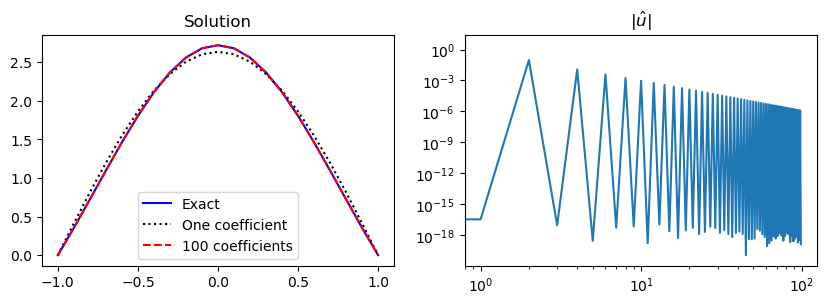

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from IPython.display import display

x = sp.Symbol('x')

ue = (1-x**2)*sp.exp(sp.cos(x))
f = ue.diff(x, 2) # manufactured f
#uhat = lambda j: -(4/(j+1)**2/sp.pi**2)*sp.integrate(f*sp.sin((j+1)*sp.pi*(x+1)/2), (x, -1, 1))
uhat = lambda j: -(4/(j+1)**2/np.pi**2)*quad(sp.lambdify(x, f*sp.sin((j+1)*sp.pi*(x+1)/2)), -1, 1)[0]

uh = []
N = 100
for k in range(N):
    uh.append(uhat(k))

M = 20
xj = np.linspace(-1, 1, M+1)
sines = np.sin(np.pi/2*(np.arange(len(uh))[None, :]+1)*(xj[:, None]+1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, sines[:, :1] @ np.array(uh)[:1], 'k:',
         xj, sines @ np.array(uh), 'r--')
ax2.loglog(abs(np.array(uh)))
ax1.legend(['Exact', 'One coefficient', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');

```{note}
An even function $f(x)$ is such that $f(x) = f(-x)$. An odd function is such that $f(x) = -f(-x)$.
```

```{note}
All the odd coefficients $\hat{u}_{2i+1}, i \in (0, 1, \ldots)$ are zero because the solution $u(x) = \exp(\cos(x))$ is an even function.
```
The basis functions $\sin(\pi (j+1)(x+1)/2)$ are alternately even/odd for even/odd values of $j$. Since the solution is even, only the even basis functions contribute to the series expansion in $V_N$ and we could simply omit all the odd basis functions. Normally, though, we do not know if the solution is odd, even or something else, which is why it is best to combine odd and even basis functions. The Legendre and Chebyshev polynomials are also odd/even for odd/even basis numbers $j$. 

The (unmapped) sine functions $\sin(\pi(j+1)x), x \in [-1, 1]$ are odd for all integer $j \ge 0$, which makes them a basis only for odd functions. Hence they cannot be used to find the even solution above. The fact that $\sin(\pi(j+1)x)$ is odd for $x \in [-1, 1]$  is why we need to map the physical space to the reference space $[0, 1]$ and work with basis functions $\sin(\pi (j+1)(x+1)/2)$. 

The first 7 basis functions $\sin(\pi (k+1)(x+1)/2)$ are plotted below, with the even functions to the left and the odd functions to the right.

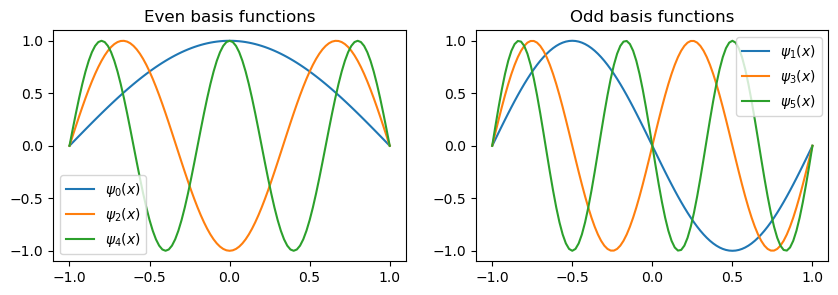

In [2]:
M = 100
xj = np.linspace(-1, 1, M+1)
sines = np.sin(np.pi/2*(np.arange(6)[None, :]+1)*(xj[:, None]+1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sines[:, ::2])
ax2.plot(xj, sines[:, 1::2])
ax1.set_title('Even basis functions')
ax2.set_title('Odd basis functions')
ax1.legend([f"$\psi_{i}(x)$" for i in range(0, 6, 2)]);
ax2.legend([f"$\psi_{i}(x)$" for i in range(1, 6, 2)]);

Lets solve the same problem with Legendre polynomials instead and basis functions $\psi_i(x) = P_i(x)-P_{i+2}(x)$. The first 4 of these basis functions are shown below. Note that even numbered basis functions 0 and 2 are even, whereas the odd numbered basis functions are odd.

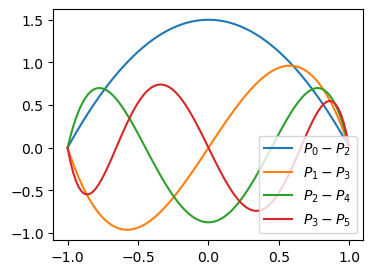

In [3]:
from numpy.polynomial import Legendre as Leg
psi = lambda j: Leg.basis(j)-Leg.basis(j+2)
xj = np.linspace(-1, 1, 100)
plt.figure(figsize=(4, 3))
for i in range(4):
    plt.plot(xj, psi(i)(xj))
plt.legend(['$P_0-P_2$', '$P_1-P_3$', '$P_2-P_4$', '$P_3-P_5$'])


The function space $V_N = \text{span}\{P_i-P_{i+2}\}_{i=0}^N$ is now a subspace of $\mathbb{P}_{N+2}$ since $\psi_N=P_N-P_{N+2}$, and $P_{N+2}$ is a polynomial of order $N+2$. The subspace can also be denoted as $V_N=\{v \in \mathbb{P}_{N+2} | v(\pm 1)=0\}$. In order to solve Eq. {eq}`eq-poisson-gal-ibp` we need to assemble the stiffness matrix and to this end we will also make use of the following formula, which is only valid for Legendre polynomials

$$
(2j+3)P_{j+1} = P'_{j+2}-P'_{j}.
$$

We get that 

$$
\begin{align*}
\left(\psi'_j, \psi'_i\right) &= \left(P'_j-P'_{j+2}, P'_i - P'_{i+2}\right), \\
  &=\left(-(2j+3)P_{j+1}, -(2i+3)P_{i+1}\right), \\
  &= (2j+3)(2i+3)\frac{2 \delta_{i+1,j+1}}{2j+3}, \\
  &= (4i+6) \delta_{ij},
\end{align*}
$$

since $\delta_{i+1,j+1}=\delta_{i,j}$ and $(P_{j+1}, P_{i+1}) = \frac{2}{2i+3}\delta_{i+1,j+1}$. So the stiffness matrix is diagonal also for Legendre polynomials. We can thus solve Eq. {eq}`eq-poisson-gal-ibp` as

$$
\hat{u}_i = \frac{-1}{4i+6}\left(f, \psi_i\right).
$$

An implementation is shown below

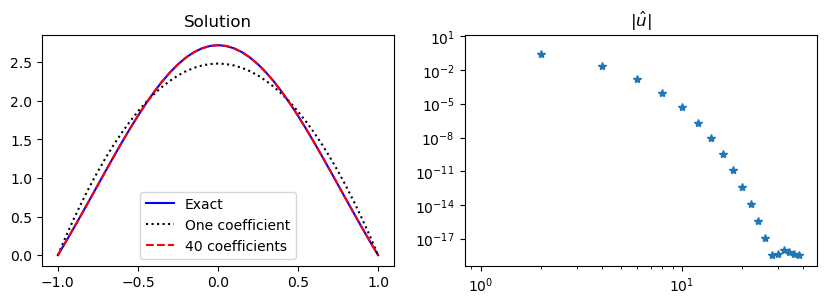

In [4]:
fj = sp.lambdify(x, f)
def uv(xj, j): return psi(j)(xj) * fj(xj)
uhat = lambda j: (-1/(4*j+6))*quad(uv, -1, 1, args=(j,))[0]

uh = []
N = 40
for k in range(N):
    uh.append(uhat(k))

j = sp.Symbol('j', integer=True, positive=True)
M = 40
xj = np.linspace(-1, 1, M+1)
Ps = sp.lambdify((j, x), sp.legendre(j, x)-sp.legendre(j+2, x))(*np.meshgrid(np.arange(N), xj))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, Ps[:, :1] @ np.array(uh)[:1], 'k:',
         xj, Ps @ np.array(uh), 'r--')
ax2.loglog(abs(np.array(uh)), '*')
ax1.legend(['Exact', 'One coefficient', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');

We note that less than 30 Legendre basis functions are required for full machine precision ($\approx 10^{-16}$). And exactly like for the sine basis functions all the odd coefficients are zero.

We can use [Shenfun](https://github.com/spectralDNS/shenfun) to implement the same problem with even less effort. For shenfun the function space is created with boundary conditions specified. If we write `bc=(a, b)` this is interpreted as two Dirichlet conditions at the two edges of the domain. In this case Shenfun makes use of the same basis functions as used above.

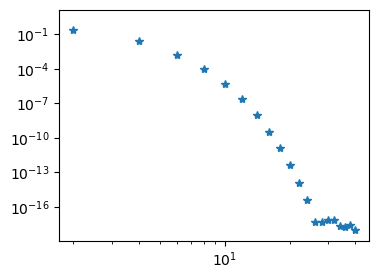

In [5]:
from shenfun import FunctionSpace, TestFunction, TrialFunction, inner, Dx

N = 40
VN = FunctionSpace(N+3, 'L', bc=(0, 0))
u = TrialFunction(VN)
v = TestFunction(VN)
S = inner(Dx(u, 0, 1), -Dx(v, 0, 1))
b = inner(f, v)
uh = S.solve(b.copy())
fig = plt.figure(figsize=(4, 3))
plt.loglog(np.arange(0, N+1, 2), abs(uh[:-2:2]), '*');

Here `S` is the stiffness matrix, which has a `solve` method. It is possible to transform this matrix into a regular Scipy sparse matrix and solve the problem this way:

In [6]:
import scipy.sparse as sparse
Ss = S.diags('csr')
uh2 = sparse.linalg.spsolve(Ss, b[:-2])
assert np.allclose(np.array(uh)[:-2], uh2)

Note that the matrix $S \in \mathbb{R}^{(N+1)\times (N+1)}$ as expected, whereas $uh \in \mathbb{R}^{N+3}$ and $b \in \mathbb{R}^{N+3}$. This has to do with the two (possibly nonzero) boundary conditions, which are then stored in `uh[-2]`` and `uh[-1]`. Also, note that because of these two boundary conditions shenfun created the space $V_N=\text{span}\{P_i-P_{i+2}\}_{i=0}^{N}$ using the first argument $N+3$ and not $N+1$.

#### Boundary conditions

##### Inhomogeneous Dirichlet 

Lets make a minor change and solve Poisson's equation with non-zero boundary conditions

$$
u'' = f, \quad x \in [-1, 1], \, u(-1) = a, u(1) = b.
$$

The problem is nearly the same as before, but we cannot simply use $u_N \in V_N$ because all the basis functions satisfy $\psi_i(\pm 1) = 0$. However, we can do as in Sec {ref}`sec-boundary-issues` and add a boundary function

$$
u_N(x) = B(x) + \sum_{i=0}^N \hat{u}_i \psi_i(x),
$$

where $B(-1) = a$ and $B(1) = b$. A function that satisfies this in the current domain is 

$$
B(x) = \frac{b}{2}(1+x) + \frac{a}{2}(1-x).
$$


We can now define a new (homogeneous) function

$$
\tilde{u}(x) = u(x) - B(x), 
$$

such that $\tilde{u}(\pm 1) = 0$. And then since $u'' = \tilde{u}''+B'' = \tilde{u}''$, we can solve

$$
\tilde{u}'' = f, \quad x\in [-1, 1], \, \tilde{u}(\pm 1) = 0.
$$

The variational form becomes: find $\tilde{u}_N \in V_N = \text{span}\{\psi_i\}_{i=0}^N$ such that

$$
\left(\tilde{u}_N''-f, v \right) = 0, \quad \forall \, v \in V_N.
$$

And then, in the end, we simply set $u_N = \tilde{u}_N + B$.

As an example, we use the manufactured solution $u(x) = \exp(\cos(x-0.5))$, and reuse most of the code from the Legendre case above. In fact, the code used to solve for the Legendre coefficients is identical, and only the right hand side needs to be modified since the manufactured solution is new: 

In [7]:
ue = sp.exp(sp.cos(x-0.5))
f = ue.diff(x, 2)
fj = sp.lambdify(x, f)
def uv(xj, j): return psi(j)(xj) * fj(xj)
uhat = lambda j: (-1/(4*j+6))*quad(uv, -1, 1, args=(j,))[0]

uh = []
N = 30
for k in range(N):
    uh.append(uhat(k))


We have now found $\tilde{u}_N$ and we compute $u_N = \tilde{u} + B(x)$ below. It is the same code as before, only with $B(x)$ added. The result is also equally good, with the Legendre coefficients moving quickly to zero. However, since the solution now is neither odd nor even, all the Legendre coefficients are nonzero.

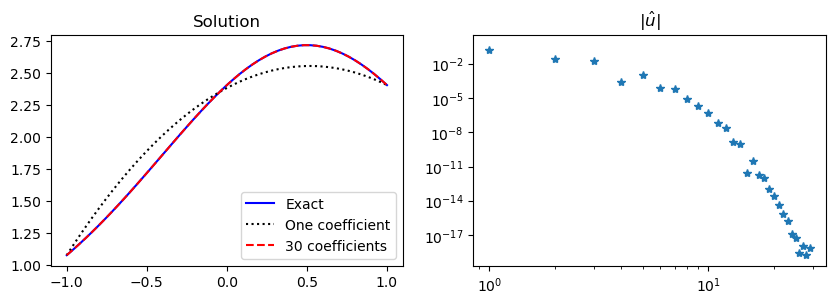

In [8]:
a, b = ue.subs(x, -1), ue.subs(x, 1)
B = b*(1+x)/2 + a*(1-x)/2
M = 50
xj = np.linspace(-1, 1, M+1)
Ps = sp.lambdify((j, x), sp.legendre(j, x)-sp.legendre(j+2, x))(*np.meshgrid(np.arange(N), xj))
Bs = sp.lambdify(x, B)(xj)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, Ps[:, :1] @ np.array(uh)[:1] + Bs, 'k:',
         xj, Ps @ np.array(uh) + Bs, 'r--')
ax2.loglog(abs(np.array(uh)), '*')
ax1.legend(['Exact', 'One coefficient', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');


##### Neumann boundary conditions

Poisson's equation is also often solved with Neumann boundary conditions

$$
u'' = f, \quad x \in [-1, 1], \, u'(\pm 1) = 0.
$$(eq-poisson-neumann)

However, this problem is actually ill-defined because if $u$ is a solution, then $u + c$, where $c$ is a constant, is also a solution. This follows since both the equation and both the boundary conditions contain at least one derivative. After all, $(u+c)'' = u'' + c'' = u'' $ and $(u+c)' = u' + c' = u'$. Bottom line, we need an additional constraint in order to pose a well-defined Neumann problem. A common additional constraint to {eq}`eq-poisson-neumann` is to require that

$$
(u, 1) = \int_{\Omega} u(x) dx = c,
$$(eq-neumann-constraint)

where $c$ is still a constant. 

```{note}
It is only the pure Neumann problem that is ill-defined. If we switch one of the boundary conditions with a Dirichlet condition, then it will be well-defined. 
```

The Neumann problem can be solved with basis functions 

$$
\begin{align*}
\psi_j(x) &= \cos(\pi j(x+1)/2), \\
\psi_j(x) &= P_j - \frac{j(j+1)}{(j+2)(j+3)}P_{j+2},
\end{align*}
$$(eq-basis-neumann)

because they all satisfy $\psi'_j(\pm 1) = 0$. However, note that for both the cosine and the Legendre bases we get that $\psi_0 = 1$ since $\cos(0) = P_0 = 1$. This basis function is such that $\psi'_0=0$ and it will as such lead to a zero column in  the stiffness matrix since $(\psi''_0, \psi_i) = 0$. Hence this basis function cannot be used for solving Poisson's equation directly. It can, however, be used to fix the constraint {eq}`eq-neumann-constraint`.

We solve the Neumann problem with the function space $V_N = \text{span}\{\psi_j\}_{j=0}^N$, but in order to also specify the constraint {eq}`eq-neumann-constraint` we will need to use a modified function space $\{u_N \in V_N | (u_N, 1) = c \}$. Since $(\psi_j, 1) = 0$ for all $j \in (1, 2, \ldots, N)$, we get that 

$$
(u_N, 1) = \sum_{j=0}^N (\psi_j, 1) \hat{u}_j = (\psi_0, 1)\hat{u}_0 = c,
$$

and since $(\psi_0, 1) = (1, 1) = 2$ we get that $\hat{u}_0 = c/2$. So the first of the unknowns is already fixed, and we need only solve for $\{\hat{u}_j\}_{j=1}^N$. To this end, for the remaining unknowns we use the modified $\tilde{V}_N = \text{span}\{\psi_j\}_{j=1}^N$ and find $\tilde{u}_N \in \tilde{V}_N$ such that

$$
(\tilde{u}_N'', v) = f, \quad \forall \, v \in \tilde{V}_N.
$$

And then we use $u_N = \hat{u}_0 + \tilde{u}_N = \sum_{j=0}^N \hat{u}_j \psi_j$.

Lets consider the cosine basis first with $V_N = \text{span}\{\cos(\pi j (x+1)/2)\}_{j=0}^N$. For all $i, j > 0$ we get the stiffness matrix

$$
\begin{align*}
s_{ij} &= \left((\cos(\pi j (x+1)/2))'', \cos(\pi i (x+1)/2) \right), \\
  &= - \frac{\pi^2 j^2}{4}\left(\cos(\pi j (x+1)/2), \cos(\pi i (x+1)/2) \right), \\
  &= - \frac{\pi^2 j^2}{4} \delta_{ij}.
\end{align*}
$$

We can thus solve Eq. {eq}`eq-poisson-neumann` for all $i>0$ as

$$
\hat{u}_i = -\frac{4}{\pi^2 i^2} \left(f, \cos(\pi i (x+1)/2) \right), \quad i \in (1, 2, \ldots, N),
$$

and we already know that $\hat{u}_0 = c/2$.

We can implement the Neumann problem using a manufactured solution that satisfies the correct boundary conditions:

In [9]:
ue = sp.integrate((1-x**2)*sp.cos(x-sp.S.Half), x)
f = ue.diff(x, 2) # manufactured f
c = sp.integrate(ue, (x, -1, 1)).n()
uhat = lambda j: -4/(j**2*np.pi**2)*quad(sp.lambdify(x, f*sp.cos(j*sp.pi*(x+1)/2)), -1, 1)[0]
uh = [c/2]
N = 100
for k in range(1, N):
    uh.append(uhat(k))

The solution can then be plotted along with the absolute value of the coefficients $\{|\hat{u}_j|\}_{j=0}^N$, which shows how the series is converging.

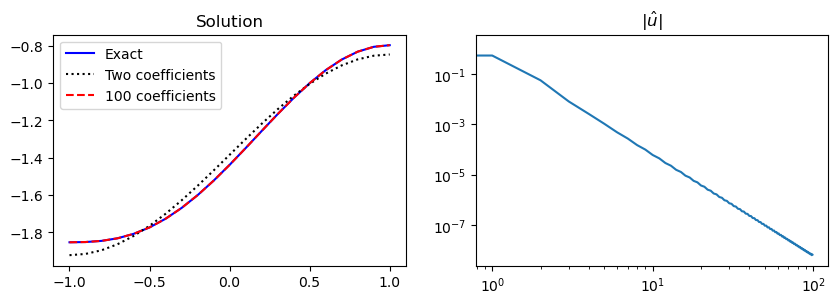

In [10]:
M = 20
xj = np.linspace(-1, 1, M+1)
cosines = np.cos(np.pi/2*np.arange(len(uh))[None, :]*(xj[:, None]+1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, cosines[:, :2] @ np.array(uh)[:2], 'k:',
         xj, cosines @ np.array(uh), 'r--')
ax2.loglog(abs(np.array(uh)))
ax1.legend(['Exact', 'Two coefficients', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');

We can do the same for Legendre basis $V_N = \{\psi_j\}_{j=0}^N$ and $\tilde{V}_N = \{\psi_j\}_{j=1}^N$, where the basis functions are as given in {eq}`eq-basis-neumann`. The stiffness matrix is then

$$
s_{ij} = (\psi''_j, \psi_i) = -(\psi'_j, \psi'_i),
$$

and it can be shown with a lot of tedious work that 

$$
s_{ij} = -\alpha(i) \delta_{ij},
$$(eq-neumann-stiffness)

where $\alpha(i) = i(i+1)-\frac{i^2(i+1)^2}{(i+2)(i+3)}$. Since the stiffnesss matrix is diagonal we can easily solve for the unknown expansion coefficients

$$
\hat{u}_i = \frac{-1}{\alpha(i)}(f, \psi_i), \quad i \in (1, 2, \ldots, N),
$$

and again $\hat{u}_0 = c/2$.

In [11]:
psi = lambda j: Leg.basis(j)-j*(j+1)/((j+2)*(j+3))*Leg.basis(j+2)
fj = sp.lambdify(x, f)
def uv(xj, j): return psi(j)(xj) * fj(xj)
def alpha(j): return j*(j+1)-j**2*(j+1)**2/((j+2)*(j+3))
uhat = lambda j: -1/alpha(j)*quad(uv, -1, 1, args=(j,))[0]
N = 30
uh = [c/2]
for k in range(1, N):
    uh.append(uhat(k))

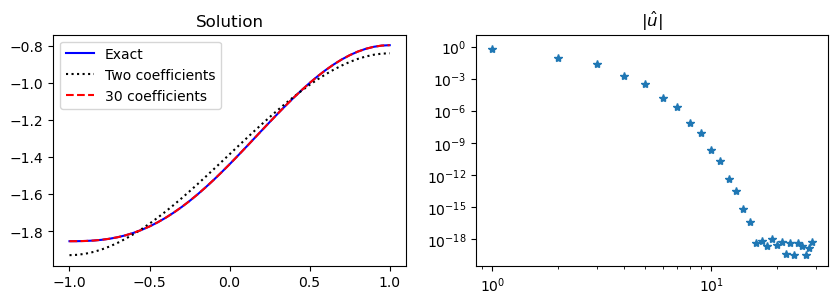

In [12]:
M = 40
xj = np.linspace(-1, 1, M+1)
Ps = sp.lambdify((j, x), sp.legendre(j, x)-j*(j+1)/((j+2)*(j+3))*sp.legendre(j+2, x))(*np.meshgrid(np.arange(N), xj))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, Ps[:, :2] @ np.array(uh)[:2], 'k:',
         xj, Ps @ np.array(uh), 'r--')
ax2.loglog(abs(np.array(uh)), '*')
ax1.legend(['Exact', 'Two coefficients', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');

Above we solved the Neumann problem with basis functions that satisfied $\psi_j(\pm 1)=0$. However, this was not really necessary, because the boundary condition was already fixed through the variational form using {ref}`integration by parts<sec-integration-by-parts>` on the stiffness matrix

$$
(u'', v) = -(u', v') + [u' v]_{-1}^1.
$$

Now, since $u'(\pm 1) = 0$, we can specify this boundary condition simply by neglecting $[u' v]_{-1}^1 = 0$ and thus use $(u'', v) = -(u', v')$. This actually enforces the Neumann boundary condition weakly and as such there is no need to set it twice. However, it evidently does not hurt either, and it is only through the use of Neumann basis functions that we obtain a diagonal stiffness matrix in Eq. {eq}`eq-neumann-stiffness`. If we simply use the basis functions $\psi_j = P_j$, then the stiffness matrix turns out to be not diagonal we need to set up and solve a linear algebra problem. Let us try this approach as well, just to illustrate that the Neumann condition is now satisfied even though the basis functions $\psi_j(\pm 1) \ne=0$.

In [13]:
psi = lambda j: Leg.basis(j)
fj = sp.lambdify(x, f)
def uf(xj, j): return psi(j)(xj) * fj(xj)
def uv(xj, i, j): return -psi(i).deriv(1)(xj) * psi(j).deriv(1)(xj)
fhat = lambda j: quad(uf, -1, 1, args=(j,))[0]

N = 20
# Compute the stiffness matrix
S = np.zeros((N, N))
for i in range(1, N):
    for j in range(i, N):
        S[i, j] = quad(uv, -1, 1, args=(i, j))[0]
        S[j, i] = S[i, j]
S[0, 0] = 1 # To fix constraint uh[0] = c/2

fh = [c/2] # constraint
for k in range(1, N):
    fh.append(fhat(k))
fh = np.array(fh, dtype=float)
uh = np.linalg.solve(S, fh)


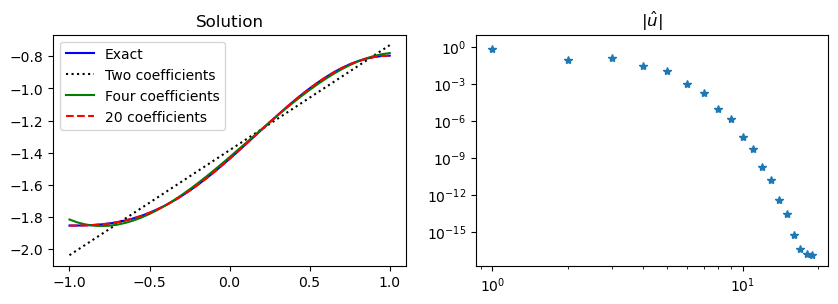

In [14]:
j = sp.Symbol('j', integer=True, positive=True)
M = 40
xj = np.linspace(-1, 1, M+1)
Ps = sp.lambdify((j, x), sp.legendre(j, x))(*np.meshgrid(np.arange(N), xj))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(xj, sp.lambdify(x, ue)(xj), 'b',
         xj, Ps[:, :2] @ np.array(uh)[:2], 'k:',
         xj, Ps[:, :4] @ np.array(uh)[:4], 'g',
         xj, Ps @ np.array(uh), 'r--')
ax2.loglog(abs(np.array(uh)), '*')
ax1.legend(['Exact', 'Two coefficients', 'Four coefficients', f'{N} coefficients'])
ax1.set_title('Solution')
ax2.set_title('$|\hat{u}|$');

```{note}
When the Neumann boundary conditions are set weakly, the computed solution will not satisfy the boundary conditions exactly. The boundary conditions will converge towards the correct solution, though, just like for the rest of the problem.
```

The Neumann problem can also be solved with shenfun.

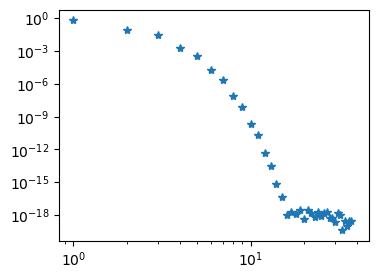

In [15]:
N = 40
V = FunctionSpace(N+3, 'L', bc={'left': {'N': 0}, 'right': {'N': 0}})
u = TrialFunction(V)
v = TestFunction(V)
S = inner(Dx(u, 0, 1), -Dx(v, 0, 1))
b = inner(f, v)
uh = S.solve(b.copy())
fig = plt.figure(figsize=(4, 3))
plt.loglog(np.arange(0, N+1), abs(uh[:-2]), '*');

```{note}
Poisson's equation can be solved with any combination of Dirichlet and Neumann boundary conditions. In shenfun these are specified as a dictionary. For example `{'left': {'N': a}, 'right': {'D': b}}` for Neumann at the left boundary and Dirichlet on the right, whereas `{'left': {'N': a, 'D': b}}` specifies both Dirichlet and Neumann on the left hand side and nothing on the right. Shenfun will choose appropriate basis functions that satisfy the given (but homogeneous) boundary conditions. Shenfun also adds boundary functions for nonzero boundary conditions automatically.  
```

### Collocation

The collocation method is very popular mainly because it is intuitive and easy to implement (it requires no integration). However, it is not very often used for solving PDEs as a global method. The main reason for this is that it is less efficient and requires more memory than a well planned *modal* Galerkin method. The Galerkin methods we have seen above have all, with one exception, led to diagonal stiffness matrices for Poisson's equation. While this may not be the case for other equations, the modal methods will usually lead to banded matrices that are easy to invert. We will see below that the collocation method leads to a dense stiffness matrix. 

We will now solve Poisson's equation using collocation and Lagrange polynomials. The procedure is exactly like for function approximation, but now we satisfy a differential equation instead of an algebraic, and we apply the boundary conditions $u(-1)=a$ and $u(1)=b$ at the two edges. We thus attempt to find $u_N \in V_N$ such that the following $N+1$ equations are satisfied

$$
\begin{align*}
\mathcal{R}_{N}(x_j) &= 0, \quad \forall \, j \in (1, 2, \ldots, N-1), \\
u_N(-1) &=  a \quad \text{and} \quad u_N(1) = b.
\end{align*}
$$

The basis is $\{\ell_j\}_{j=0}^N$, and just like for function approximation it is advantageous to use a computational mesh that is not uniform, but rather skewed towards the edges. We will use the Chebyshev points $\{\cos(i \pi /N)\}_{i=0}^N $ and the Lagrange polynomials that are still

$$
\ell_j(x) = \prod_{\substack{0 \le m \le N \\ m \ne j}} \frac{x-x_m}{x_j-x_m}.
$$

Inserting for the Lagrange polynomials and $u_N$ in $\mathcal{R}_N(x_i)=0$ we get the $N-1$ equations

$$
\sum_{j=0}^N \ell''_j(x_i) \hat{u}_j = f(x_i), \quad i = (1, 2, \ldots, N-1), 
$$(eq-poisson-coll)

plus the two boundary conditions that lead to $\hat{u}_0 = a$ and $\hat{u}_N = b$. To solve this problem we will use a second **derivative matrix**, $D^{(2)} = (\ell^{''}_j(x_i))_{i,j=0}^N$, modified in the first and last rows to account for the boundary conditions. This is the same approach as used for the finite difference method.

```{note}
The global collocation method is similar to the finite difference methods in that we assemble and use derivative matrices. However, the derivative matrices are dense and not banded, since all mesh points are used by all basis functions.
```

The derivative matrix of any order $n$ is defined as $d^{(n)}_{ij} = \ell^{(n)}_{j}(x_i)$, where $\ell^{(n)}_j(x) = \frac{d^n }{dx^n}\ell_j(x)$. We use this matrix directly to compute derivatives in mesh points. That is, for the mesh $\{x_i\}_{i=0}^N$, we find the $n$'th derivative of the mesh function $\boldsymbol{u} = \{u_j\}_{j=0}^N$, where $u_j = u(x_j)$ as

$$
\frac{d^n}{dx^n} u_j = \sum_{j=0}^N d^{(n)}_{ij} u_{j}.
$$

Alternatively, on matrix form

$$
\frac{d^n}{dx^n}\boldsymbol{u} = D^{(n)} \boldsymbol{u},
$$

where $D^{(n)} = (d^{(n)}_{ij})_{i,j=0}^N$. The Poisson problem {eq}`eq-poisson-coll` can as such be assembled as

$$
\tilde{D}^{(2)} \boldsymbol{\hat{u}} = \boldsymbol{f},
$$

where $\tilde{D}^{(2)}$ is $D^{(2)}$ modified to account for boundary conditions (by identing the first and last row).

The derivatives of Lagrange polynomials $\ell^{(n)}_j$ can be computed directly from the Sympy functions we have defined and used until now, as implemented in [lagrange.py](https://github.com/MATMEK-4270/matmek4270-book/blob/main/lagrange.py). However, these direct formulas are not very resistant towards round off errors and it turns out that it is much more efficient to use some ready made formulas. First the Lagrange polynomial can be written as

$$
\ell_j(x) = \theta(x) \frac{w_j}{x-x_j},
$$

where 

$$
\begin{align*}
\theta(x) &= \prod^N_{\substack{i=0}}(x-x_i), \\
w_j &= \frac{1}{\prod^N_{\substack{i=0 \\ i \neq j}} (x_j - x_i)}, \quad j \in (0, 1, \ldots, N).
\end{align*}
$$ 

Here $\{w_j\}_{j=0}^N$ are often referred to as barycentric weights. These weights are readily available from [scipy.interpolate.BarycentricInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BarycentricInterpolator.html). We can then obtain the derivative matrix $d_{ij} = \ell'_j(x_i)$ as

$$
\begin{align*}
d_{ij} &= \frac{w_j}{w_i(x_i-x_j)}, \quad i \, \neq j, \\
d_{ii} &= -\sum_{\substack{j=0 \\ j \ne i}}^N d_{ij}.
\end{align*}
$$(eq-derivative-coll)

This derivative is implemented below using vectorized and efficient Python code.

In [16]:
from scipy.interpolate import BarycentricInterpolator
def Derivative(xj):
    w = BarycentricInterpolator(xj).wi
    W = w[None, :] / w[:, None]
    X = xj[:, None]-xj[None, :]
    np.fill_diagonal(X, 1)
    D = W / X
    np.fill_diagonal(D, 0)
    np.fill_diagonal(D, -np.sum(D, axis=1))
    return D

In `Derivative` we use vectorization and Numpy broadcasting to implement {eq}`eq-derivative-coll` efficiently. To elaborate, we compute a dense matrix `W` of shape $(N+1) \times (N+1)$ with indices

$$
W_{ij} = \frac{w_j}{w_i}, \quad (i, j) \in \mathcal{I}_N^2.
$$

This is implemented as `W = w[None, :] / w[:, None]`. Here `w[None, :]` is a row vector of shape $1 \times (N+1)$, whereas `w[:, None]` is a column vector of shape $(N+1) \times 1$. When we take the elementwise division `w[None, :] / w[:, None]`, then these two vectors have different shape and Numpy tries to broadcast them into the same shape. The shape that works for both arrays is $(N+1) \times (N+1)$. This is only possible to illustrate with an example. 

Assume that we have a vector `w = (1, 2, 3)` of shape `(3,)`. From this we create `w[None, :]`, which is of shape `(1, 3)` and `w[:, None]` of shape `(3, 1)`

In [17]:
w = np.array([1, 2, 3])
display(w), display(w[None, :]), display(w[:, None]);

array([1, 2, 3])

array([[1, 2, 3]])

array([[1],
       [2],
       [3]])

Now multiply `w[None, :] * w[:, None]` and obtain a $3 \times 3$ matrix.

In [18]:
w[None, :] * w[:, None]

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

Here `w[None, :]` and `w[:, None]` are first broadcasted to the two $3 \times 3$ matrices that are constant along the first and second axis, respectively. The matrices are extruded along the axis that contains `None`. So `w[None, :]` is extruded along the first axis and `w[:, None]` along the second. 

In [19]:
np.broadcast_to(w[None, :], (3, 3)), np.broadcast_to(w[:, None], (3, 3))

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]))

In the end the extruded $3 \times 3$ matrices are of the same shape and they may be multiplied together elementwise. However, the intermediate $3 \times 3$ matrices are never actually created. Numpy handles all this under the hood and it is very efficient. Try to implement `Derivative` with for-loops and without vectorization. You will probably find that it is easier to implement, but the code is also likely to run much slower.

Back to the derivative matrix. We have computed the first derivative matrix, and the second derivative matrix, or any higher order $d_{ij}^{(n)}$, can now be implemented recursively as

$$
\begin{align*}
d^{(n)}_{ij} &= \frac{n}{x_i-x_j}\left(\frac{w_j}{w_i} d^{(n-1)}_{ii} - d^{(n-1)}_{ij} \right), \\
d^{(n)}_{ii} &= -\sum_{\substack{j=0 \\ j \ne i}}^N d^{(n)}_{ij}.
\end{align*}
$$

A vectorized implementation of this recursive algorithm is shown below in `PolyDerivative`:

In [20]:
def PolyDerivative(xj, m):
    w = BarycentricInterpolator(xj).wi
    #D = Derivative(xj) # compute it directly below because W and X are needed
    W = w[None, :] / w[:, None]
    X = xj[:, None]-xj[None, :]
    np.fill_diagonal(X, 1)
    D = W / X
    np.fill_diagonal(D, 0)
    np.fill_diagonal(D, -np.sum(D, axis=1))
    if m == 1:
        return D
    D2 = np.zeros_like(D)
    for k in range(2, m+1):
        D2[:] = k / X * (W * D.diagonal()[:, None] - D)
        np.fill_diagonal(D2, 0)
        np.fill_diagonal(D2, -np.sum(D2, axis=1))
        D[:] = D2
    return D2

Both `Derivative` and `PolyDerivative` are available in the [lagrange.py](https://github.com/MATMEK-4270/matmek4270-book/blob/main/lagrange.py) module. 

We now create a solver `poisson_coll` that assembles and solves Poisson's equation with `N+1` collocation points and a given right hand side `f` as a Sympy function. We also create a function to compute the $L^2$ error, because with the collocation method you cannot simply look at the magnitude of the computed expansion coefficients as a measure of the convergence.

The linear algebra system we solve for any given $N$ is

$$
\tilde{D}^{(2)} \boldsymbol{\hat{u}} = \boldsymbol{f},
$$

such that

$$
\boldsymbol{\hat{u}} = \tilde{D}^{(-2)} \boldsymbol{f},
$$

where $\tilde{D}^{(-2)}$ is the inverse matrix of $\tilde{D}^{(2)}$.

In [21]:
def poisson_coll(N, f, bc=(0, 0)):
    xj = np.cos(np.arange(N+1)*np.pi/N)[::-1]
    D = PolyDerivative(xj, 2)      # Get second derivative matrix
    D[0, 0] = 1; D[0, 1:] = 0      # ident first row
    D[-1, -1] = 1; D[-1, :-1] = 0  # ident last row
    fh = np.zeros(N+1)
    fh[1:-1] = sp.lambdify(x, f)(xj[1:-1])
    fh[0], fh[-1] = bc             # Fix boundary conditions
    uh = np.linalg.solve(D, fh)
    return uh, D

def l2_error(uh, ue):
    uj = sp.lambdify(x, ue)
    N = len(uh)-1
    xj = np.cos(np.arange(N+1)*np.pi/N)[::-1]
    L = BarycentricInterpolator(np.cos(np.arange(N+1)*np.pi/N)[::-1], yi=uh)
    N = 2*len(uh)
    xj = np.linspace(-1, 1, N+1)
    return np.sqrt(np.trapz((uj(xj)-L(xj).astype(float))**2, dx=2./N))


We choose the manufactured solution $u(x) = \exp(\cos(x-0.5))$ and solve the problem for a range of $N$. The error is seen to disappear very quickly, matching even the Legendre method from above. However, note that in order to solve the problem we need to invert a dense matrix $\tilde{D}^{(2)}$ of shape $(N+1) \times (N+1)$. This was not necessary (or at least trivial) for the Legendre method because the stiffness matrix there was diagonal.

In [24]:
ue = sp.exp(sp.cos(x-0.5))
f = ue.diff(x, 2)
bc = ue.subs(x, -1), ue.subs(x, 1)
N = 10
uh, D = poisson_coll(N, f, bc=bc)
err = []
for N in range(2, 46, 2):
    uh, D = poisson_coll(N, f, bc=bc)
    err.append(l2_error(uh, ue))


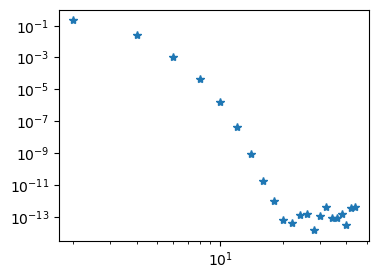

In [25]:
fig = plt.figure(figsize=(4, 3))
plt.loglog(np.arange(2, 46, 2), err, '*');

## Weekly assignments

In this weeks assignments you may choose the method of implementation: Galerkin, collocation, or both. Also, if you use a Galerkin method, then choose either Legendre or Chebyshev polynomials or both. You are also encouraged to try to implement the problems both on you own and by using [shenfun](https://github.com/spectralDNS/shenfun).

1. Solve the inhomogeneous Helmholtz equation

$$
u'' + \alpha u = f, \quad x \in [-1, 1], u(\pm 1)=0,
$$

using the manufactured solution $u(x)=(1-x^2)\exp(\cos(x-0.5))$ and $\alpha=0.1$. Try also to remove $1-x^2$ and solve the same problem with inhomogeneous boundary conditions. Plot both the solution and the $L^2$ error.

2. Solve the homogeneous Helmholtz equation in the domain $x \in [0, 1]$ and vary the parameter $\epsilon$ such that $\epsilon \in (1, 0.1, 0.01, 0.001)$:

$$
u'' + \frac{1}{\epsilon} u = 0, \quad x \in [0, 1], u(0) = 0, u(1) = 1.
$$

The exact solution is here

$$
u(x) = \frac{\exp(-x/\epsilon)-1}{\exp(-1/\epsilon)-1}.
$$

See also Sec 4.5 in [Introduction to Numerical Methods for Variational Problems](https://link.springer.com/chapter/10.1007/978-3-030-23788-2_4#Sec27).

```{hint}
The Galerkin method with Legendre polynomials lead to a diagonal stiffness matrix, but the mass matrix ($a_{ij} = (\psi_j, \psi_i) = (P_{j}-P_{j+2}, P_i-P_{i+2})$) that you need for the Helmholtz problem will be banded with three nonzero diagonals. The diagonals are located at $a_{i, i-2}, a_{i,i}, a_{i, i+2}$ and are easily computed by hand from using $(P_j, P_i) = \frac{2}{2i+1}\delta_{ij}$.
```
```{hint}
The Galerkin method with Chebyshev polynomials lead to a dense stiffness matrix and a tri-diagonal mass matrix, like for Legendre.
```